In [20]:
# import requried libraries
import pandas as pd
import numpy as np

# read dataset
dataset = pd.read_csv('Dataset/Dataset.csv')
dataset.head()

TIMESTAMP  A    B  C
0  2022032101  0  208  0
1  2022032103  0  225  0
2  2022032104  0  223  0
3  2022032104  0  221  0
4  2022032105  0  221  0

In [21]:
# explore all columns
dataset.columns

Index(['TIMESTAMP', 'A', 'B', 'C'], dtype='object')

In [22]:
# convert first column into datetime
from datetime import datetime
dataset['TIMESTAMP'] = dataset['TIMESTAMP'].astype(str).apply(lambda x: datetime.strptime(x, '%Y%m%d%H'))
dataset.head()

TIMESTAMP  A    B  C
0 2022-03-21 01:00:00  0  208  0
1 2022-03-21 03:00:00  0  225  0
2 2022-03-21 04:00:00  0  223  0
3 2022-03-21 04:00:00  0  221  0
4 2022-03-21 05:00:00  0  221  0

In [23]:
# set timestamp as index
dataset.set_index('TIMESTAMP', inplace = True)

In [24]:
dataset.head()

A    B  C
TIMESTAMP                     
2022-03-21 01:00:00  0  208  0
2022-03-21 03:00:00  0  225  0
2022-03-21 04:00:00  0  223  0
2022-03-21 04:00:00  0  221  0
2022-03-21 05:00:00  0  221  0

In [40]:
len(dataset)

28735

In [39]:
dataset.loc["2022-03"].A

TIMESTAMP
2022-03-21 01:00:00    0
2022-03-21 03:00:00    0
2022-03-21 04:00:00    0
2022-03-21 04:00:00    0
2022-03-21 05:00:00    0
2022-03-21 05:00:00    0
2022-03-21 06:00:00    0
2022-03-21 06:00:00    0
2022-03-21 07:00:00    0
2022-03-21 08:00:00    0
2022-03-21 08:00:00    0
2022-03-21 09:00:00    0
2022-03-21 10:00:00    0
2022-03-21 10:00:00    0
2022-03-21 10:00:00    0
2022-03-21 11:00:00    0
2022-03-21 11:00:00    0
2022-03-21 11:00:00    0
2022-03-21 11:00:00    0
2022-03-21 13:00:00    0
2022-03-21 14:00:00    0
2022-03-21 15:00:00    0
2022-03-21 18:00:00    0
Name: A, dtype: int64

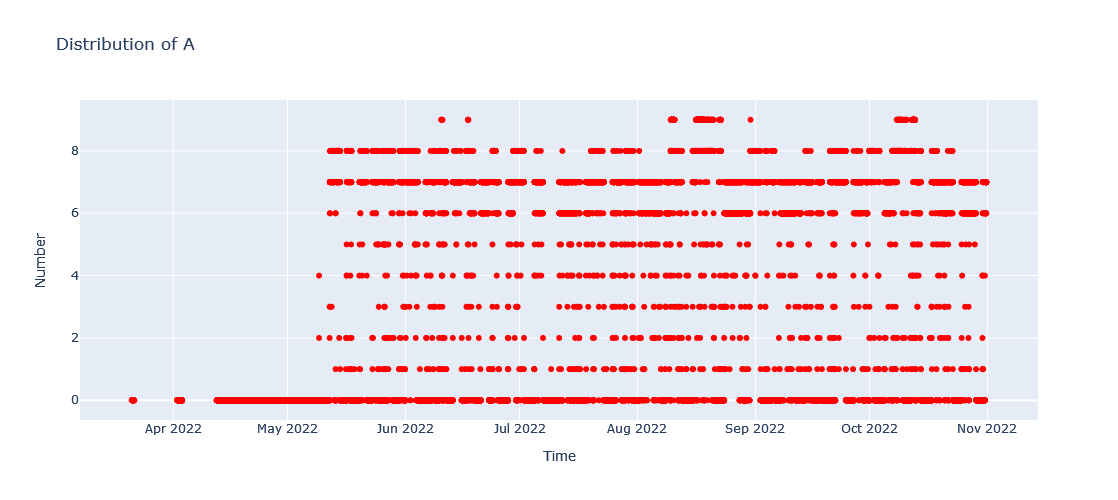

In [33]:
# plot graph to show how A spreads with the passage of time
import plotly.graph_objects as go
fig = go.Figure()

fig.add_traces(go.Scatter(x = dataset.index, y = dataset['A'], mode = 'markers', marker = dict(color = 'red')))
fig.update_layout(title = "Distribution of A", xaxis_title = "Time", yaxis_title = "Number")
fig.update_layout(height = 500)
fig.show()

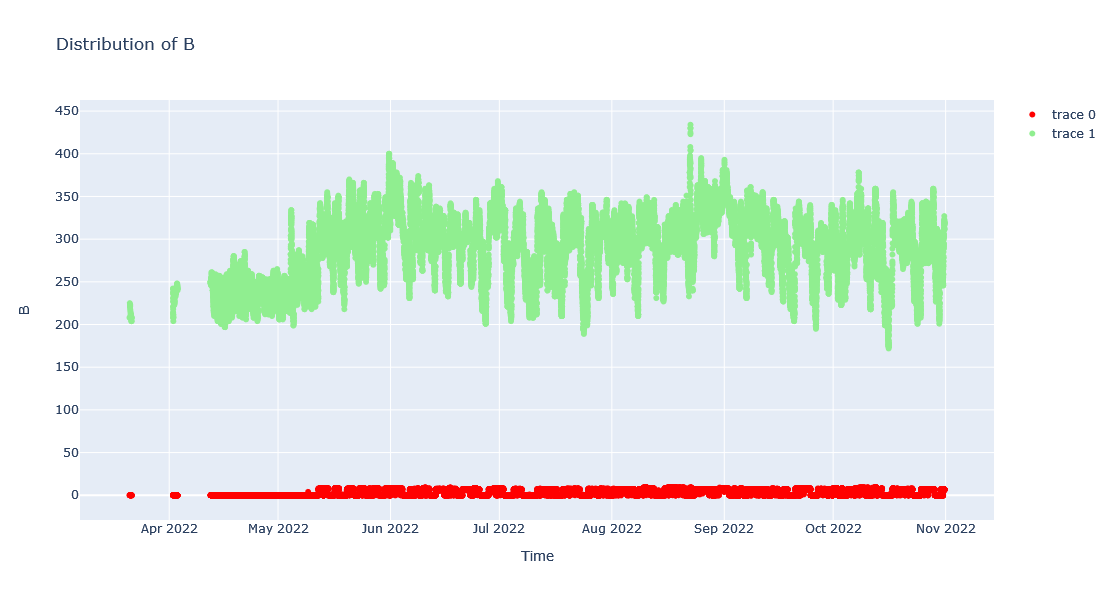

In [41]:
# show distribution of B
fig.add_traces(go.Scatter(x = dataset.index, y = dataset['B'], mode = 'markers', marker = dict(color = 'lightgreen')))
fig.update_layout(title = 'Distribution of B', xaxis_title = 'Time', yaxis_title = "B")
fig.update_layout(height = 600)
fig.show()

In [46]:
# unique values in B
dataset['B'][0]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7464\2580377060.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



208

In [50]:
dataset.A.resample('M').mean()

TIMESTAMP
2022-03-31    0.000000
2022-04-30    0.000000
2022-05-31    2.421649
2022-06-30    4.181422
2022-07-31    3.526625
2022-08-31    5.211556
2022-09-30    3.917945
2022-10-31    4.331345
Freq: M, Name: A, dtype: float64

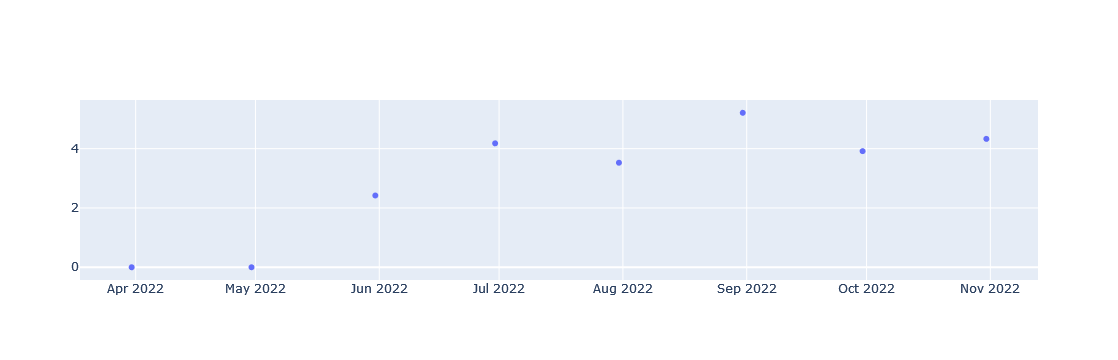

In [52]:

fig1 = go.Figure()
fig1.add_traces(go.Scatter(x = dataset.A.resample('M').mean().index, y = dataset.A.resample('M').mean(), mode = 'markers'))
fig1.show()